*This project has a large file size*

Follow these instructions to use LFS on GitHub
- git lfs install
- git lfs track 'data/yelp-reviews.csv'
- git add .gitattributes
- git add data/yelp-reviews.csv
- git commit -m 'Track large file with Git LFS'
- git push origin main

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Load Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

file_path = 'data/yelp-reviews.csv'
df = load_data(file_path)
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


### **EDA**

In [3]:
# EDA
def perform_eda(df):
    missing_values = df.isna().sum()
    
    print(f'Number of missing values: {missing_values}')

perform_eda(df)
df.info()

Number of missing values: business_id    0
review_id      0
date           0
text           0
stars          0
language       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150374 entries, 0 to 150373
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150374 non-null  object
 1   review_id    150374 non-null  object
 2   date         150374 non-null  object
 3   text         150374 non-null  object
 4   stars        150374 non-null  int64 
 5   language     150374 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.9+ MB


In [4]:
# Summary statistics
statistics = df.describe().T
print('Summary Statistics')
statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
stars,150374.0,4.006045,1.415824,1.0,3.0,5.0,5.0,5.0


### **Data Visualization**

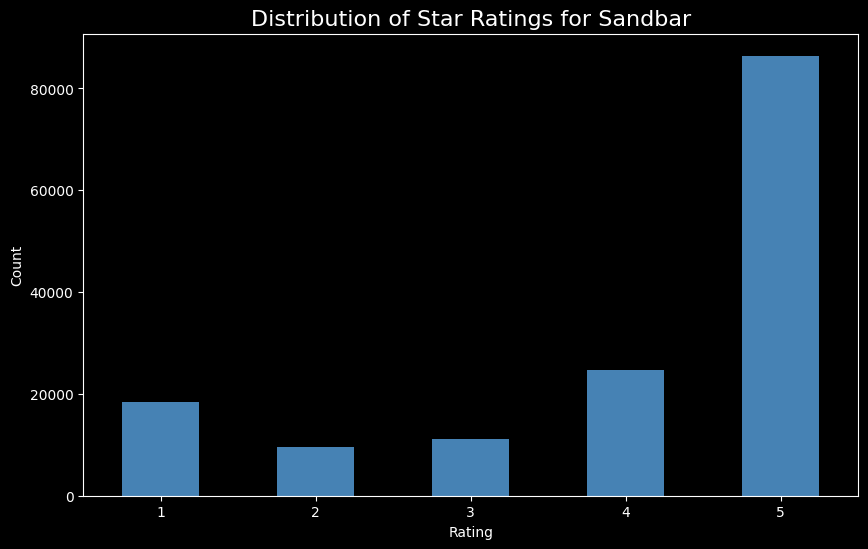

In [5]:
# Dark mode
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
df['stars'].value_counts().sort_index().plot(kind='bar', color='steelblue')

plt.title('Distribution of Star Ratings for Sandbar', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **Data Preprocessing**

In [6]:
import re

# Clean text data
def clean_data(df, text_column):
    
    # Remove missing values
    df = df.dropna(subset=[text_column, 'stars'])
    
    # Normalize text data
    df[text_column] = df[text_column].str.lower()
    
    # Remove punctuation and special characters
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
    
    return df

df = clean_data(df, text_column='text')
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en


In [7]:
# Check for NaN/missing values in the text column
missing_text = df['text'].isna().sum()
print(f'Number of missing values in text column: {missing_text}')

Number of missing values in text column: 0


### **Feature Engineering** (Tokenization and Lemmatization)

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('punkt_tab') if not downloaded

# Initialize the stopwords object
stop_words = set(stopwords.words('english'))

# Preprocess text => tokens, remove stopwords and join tokens
def preprocess_text_to_tokens(text):
    
    # Tokeinize text and filter stopwords
    filtered_tokens = [
        word for word in word_tokenize(text.lower()) if word not in stop_words
    ]
    
    # Join the tokens into a string
    return ' '.join(filtered_tokens)

# Create a tokens column and apply preprocessing to the text column and store the results in a tokens column
df['tokens'] = df['text'].apply(preprocess_text_to_tokens)

# Check transformations
df[['text', 'tokens']].head() # return only the text and tokens columns

,text,tokens
0,lynn and montecito flowers are simply the best...,lynn montecito flowers simply best awesome cho...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer and stopwords object
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text => lemmas, remove stopwords and join lemmas
def preprocess_text_to_lemmas(text):
    
    # Lemmatize text and filter stopwords
    lemmas = [
        lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stop_words
    ]
    
    # Join the lemmas into a string
    return ' '.join(lemmas)

# Create a lemmas column and apply preprocessing to the text column and store the results in a lemmas column
df['lemmas'] = df['text'].apply(preprocess_text_to_lemmas)

# Check transformations
df[['text', 'lemmas']].head() # return only the text and lemmas columns

,text,lemmas
0,lynn and montecito flowers are simply the best...,lynn montecito flower simply best awesome choi...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [10]:
# Display transformed dataframe
df.head()

,business_id,review_id,date,text,stars,language,tokens,lemmas
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en,lynn montecito flowers simply best awesome cho...,lynn montecito flower simply best awesome choi...
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en,love place always loved food truly due killer ...,love place always loved food truly due killer ...
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en,stayed last weekend dog motel style inside fou...,stayed last weekend dog motel style inside fou...
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en,came quick bite got thai salad bowl white bean...,came quick bite got thai salad bowl white bean...
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en,finally able try lunch holdrens husband ordere...,finally able try lunch holdrens husband ordere...


### **Time Series Preprocessing**
- Create a resampled dataset for time series analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert review dates to datetime objects
def convert_to_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') # Convert to datetime, handle errors
    
    return df

# Set the date as the index
def set_date_as_index(df, date_column):
    df.set_index(date_column, inplace=True)
    
    return df

# Resample the data by a specific time interval
def resample_data(df, interval='ME'): # 'M' stands for months, 'D' stands for daily, 'W' for weekly
    df_resampled = df.resample(interval).mean()
    
    return df_resampled

In [12]:
# Reset index if 'date' is currently an index and not a column
df.reset_index(inplace=True)

# Then you can apply your original function to convert 'date' column to datetime
df = convert_to_datetime(df, date_column='date')

# After conversion, set 'date' back as the index
df = set_date_as_index(df, date_column='date')

def resample_numeric_data(df, interval='M'):
    # Select only numeric columns for resampling
    numeric_df = df.select_dtypes(include='number')
    df_resampled = numeric_df.resample(interval).mean()
    return df_resampled

# Check if 'date' is already set as index
if 'date' in df.columns:
    df = set_date_as_index(df, date_column='date')

# Resample numeric data only
df_resampled = resample_numeric_data(df, interval='M')

# Check resampled data
df_resampled.head()

C:\Users\User 1\AppData\Local\Temp\ipykernel_19828\2098222764.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = numeric_df.resample(interval).mean()


,index,stars
date,,
2015-01-31,1348.0,3.936967
2015-02-28,3965.0,3.932598
2015-03-31,6596.5,3.923698
2015-04-30,9346.0,3.962856
2015-05-31,12285.5,3.933677


In [13]:
# Save the dataframe
output_path = 'data/reviews_processed_tsa.csv'
df_resampled.to_csv(output_path)
print(f'Processed dataframed saved to {output_path}')

Processed dataframed saved to data/reviews_processed_tsa.csv


In [14]:
# Load cleaned dataframe
df_resampled = pd.read_csv('data/reviews_processed_tsa.csv', keep_default_na=False)

# Check for missing values
missing_values = df_resampled.isna().sum()
print(f'Number of missing values: {missing_values}')

Number of missing values: date     0
index    0
stars    0
dtype: int64


### **Time Series Analysis**

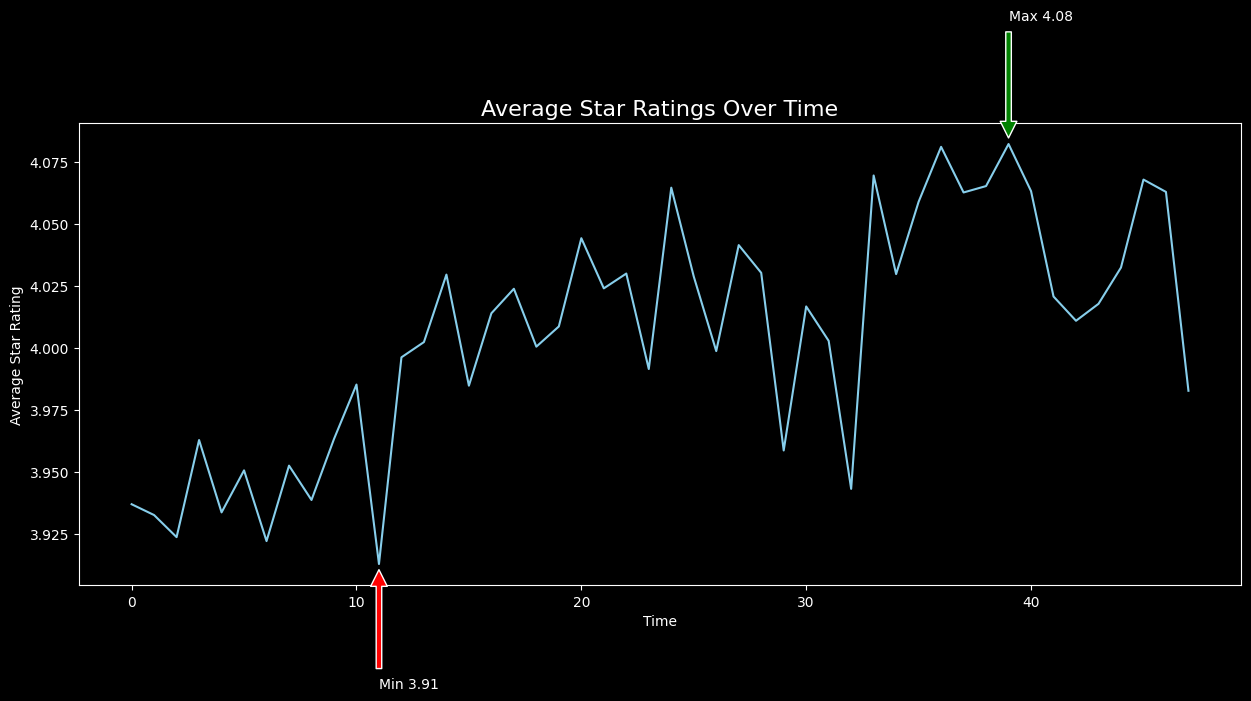

In [15]:
import matplotlib.pyplot as plt

# Annotating the hightest and lowest points
max_value = df_resampled['stars'].max()
min_value = df_resampled['stars'].min()
max_date = df_resampled['stars'].idxmax()
min_date = df_resampled['stars'].idxmin()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], color='skyblue')
plt.title('Average Star Ratings Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')

plt.annotate(f'Max {max_value:.2f}',
             xy=(max_date, max_value),
             xytext=(max_date, max_value + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate(f'Min {min_value:.2f}',
             xy=(min_date, min_value),
             xytext=(min_date, min_value + - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

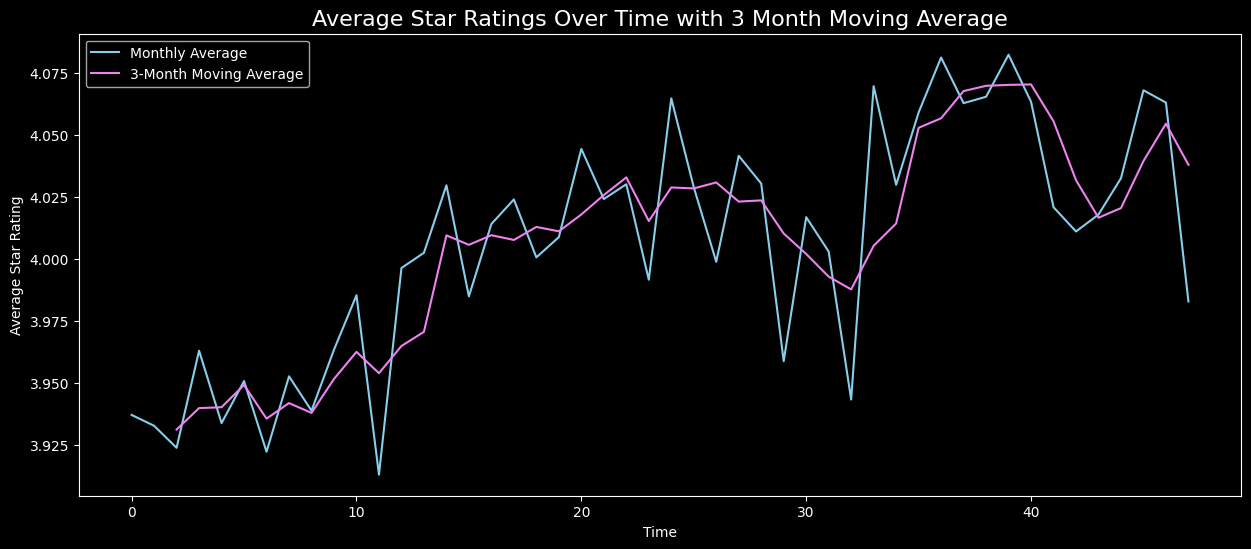

In [16]:
# Calculate 3 month-moving average
df_resampled['3-month-MA'] = df_resampled['stars'].rolling(window=3).mean()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], label='Monthly Average', color='skyblue')
plt.plot(df_resampled.index, df_resampled['3-month-MA'], label='3-Month Moving Average', color='violet')
plt.title('Average Star Ratings Over Time with 3 Month Moving Average', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')
plt.legend(loc='best')
plt.show()

### **Deep Learning**
- Data Preparation

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create sequences from the time series data
def create_sequences(data, sequence_length):
    
    sequences = []
    targets = []
    
    # Loop
    for start_index in range(len(data) - sequence_length):
        end_index = start_index + sequence_length
        sequence = data[start_index:end_index]
        target = data[end_index]
        
        sequences.append(sequence)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Sequence length 3 for quarterly, 6 is semi-annual, 12 is for annual
sequence_length = 3 # for 3 months or quarterly
X, y = create_sequences(df_resampled['stars'].values, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### LSTM Model (Long Short Term Memory) Deep Learning Model

common errors:
- ModuleNotFoundError: No module named 'tensorflow'
- `pip install tensorflow`

In [18]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# def build_lstm_model(input_shape, units_first_layer, units_second_layer, dropout_first, dropout_second):
    
#     # Initialize model
#     model = Sequential()
    
#     # Add first layer with dropout
#     model.add(LSTM(units=units_first_layer, return_sequences=True, input_shape=input_shape))
#     model.add(Dropout(dropout_first))
    
#     # Add second layer with dropout
#     model.add(LSTM(units=units_second_layer, return_sequences=False))
#     model.add(Dropout(dropout_second))
    
#     # Add output layer
#     model.add(Dense(units=1))
    
#     return model

# # Compile the model
# def compile_model(model, optimizer, loss):
#     model.compile(optimizer=optimizer, loss=loss)
    
#     return model

In [ ]:
# # Define input shape
# input_shape = (X_train.shape[1], 1)

# # Build the model
# model = build_lstm_model(input_shape, units_first_layer=100, units_second_layer=50, dropout_first=0.5, dropout_second=0.2)

# # Compile the model
# model = compile_model(model, optimizer='adam', loss='mean_squared_error')

In [ ]:
# from tqdm.keras import TqdmCallback

# # Train the model
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2,
#     callbacks=[TqdmCallback(verbose=1)]
# )

### **Model Evaluation**

In [ ]:
# # import matplotlib.pyplot as plt
# # from sklearn.metrics import mean_absolute_error, mean_squared_error

# # def evaluate_model(model, X_test, y_test):
    
# #     test_loss = model.evaluate(X_test, y_test)
# #     print(f'Test Loss: {test_loss}')
    
# #     return test_loss

# # def calculate_metrics(y_test, predictions):
# #     mse = mean_squared_error(y_test, predictions)
# #     mae = mean_absolute_error(y_test, predictions)
    
# #     print(f'Mean Squared Error: {mse}')
# #     print(f'Mean Absolute Error: {mae}')
    
# #     return mse, mae

# # def predict_and_evaluate(model, X_test, y_test):
    
# #     # Evaluate model
# #     test_loss = evaluate_model(model, X_test, y_test)
# #     predictions = model.predict(X_test)
    
# #     # Calculate metrics
# #     mse, mae = calculate_metrics(y_test, predictions)
    
# #     return predictions, mse, mae

# # predictions, mse, mae = predict_and_evaluate(model, X_test, y_test)

# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# def evaluate_model(model, X_test, y_test):
#     test_loss = model.evaluate(X_test, y_test)
#     print(f'Test Loss: {test_loss}')
    
#     return test_loss

# def calculate_metrics(y_test, predictions):
#     mse = mean_squared_error(y_test, predictions)
#     mae = mean_absolute_error(y_test, predictions)
    
#     print(f'Mean Squared Error: {mse}')
#     print(f'Mean Absolute Error: {mae}')
    
#     return mse, mae

# def predict_and_evaluate(model, X_test, y_test):
    
#     # Evaluate model
#     test_loss = evaluate_model(model, X_test, y_test)
#     predictions = model.predict(X_test)
    
#     # Calculate metrics
#     mse, mae = calculate_metrics(y_test, predictions)
    
#     return predictions, mse, mae

# predictions, mse, mae = predict_and_evaluate(model, X_test, y_test)

In [ ]:
# import matplotlib.pyplot as plt

# def plot_training_and_predictions(history, y_test, predictions):
    
#     fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
#     # Training and validation loss
#     axes[0].plot(history.history['loss'], label='Training Loss')
#     axes[0].plot(history.history['val_loss'], label='Validation Loss')
#     axes[0].set_title('Model Loss')
#     axes[0].set_xlabel('Loss')
#     axes[0].set_xlabel('Epoch')
#     axes[0].legend()
    
#     # Prediction VS Actual Values
#     axes[1].plot(y_test, label='Actual Values')
#     axes[1].plot(predictions, label='Predicted Values')
#     axes[1].set_title('Model Predictions VS Actual Values')
#     axes[1].set_xlabel('Time')
#     axes[1].set_xlabel('Star Rating')
#     axes[1].legend()
    
#     plt.tight_layout()
#     plt.show()
    
# print('LSTM Model Performance')
# plot_training_and_predictions(history, y_test, predictions)

In [ ]:
# # Save model
# model.save('models/lstm_model.h5')

### **VADER**

In [19]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon') # if not already downloaded

# Initialize the VADER object
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to the text data
def apply_vader(text):
    
    return analyzer.polarity_scores(text)

# Create vader_scores and vader_compound columns
df['vader_scores'] = df['text'].apply(apply_vader)
df['vader_compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Convert compound score to sentiment labels
def vader_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
df['vader_sentiment'] = df['vader_compound'].apply(vader_sentiment_label)

# Map stars to true_label for evaluation
def map_stars_to_sentiment(stars):
    if stars >= 4:
        return 'Positive'
    elif stars < 3:
        return 'Negative'
    else:
        return 'Neutral'
    
df['true_label'] = df['stars'].apply(map_stars_to_sentiment)

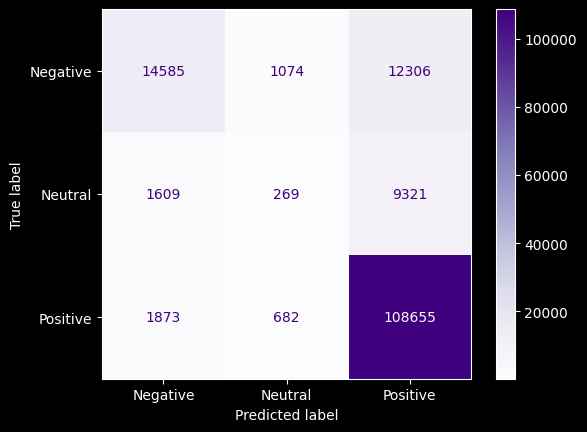

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Negative', 'Neutral', 'Positive']

# Create confusion matrix
cm = confusion_matrix(df['true_label'], df['vader_sentiment'], labels=labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

disp.plot(cmap='Purples')
plt.title('')
plt.show()

### **Naive Bayes**

In [21]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vectorize text
def vectorize_text(text_data):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text_data)
    
    return X, vectorizer

# Create binary target based on star rating
def prepare_target_variable(stars, threshold=4):
    return stars >= threshold

# Classifier model
def train_naive_bayes(X_train, y_train):
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)
    
    return nb_classifier

# Evaluate model
def evaluate_model_nb(model, X_test, y_test):
    test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)
    
    return accuracy, test_pred

In [22]:
# Vectorize text
X, vectorizer = vectorize_text(text_data=df['lemmas'])
y = df['true_label']

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train model
nb_classifier = train_naive_bayes(X_train, y_train)
accuracy, test_pred = evaluate_model_nb(nb_classifier, X_test, y_test)

print(f'Naive Bayes Accuracy with TF-IDF (Multi-Class): {accuracy:.2f}')

Naive Bayes Accuracy with TF-IDF (Multi-Class): 0.81


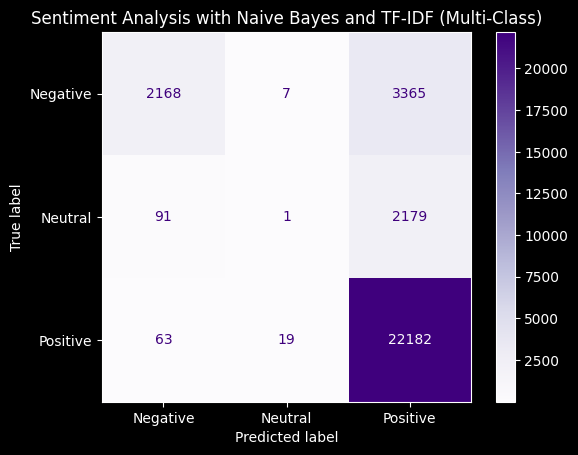

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification report
report = classification_report(y_test, test_pred, labels=labels)

# Confusion matrix
cm = confusion_matrix(y_test, test_pred, labels=labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot(cmap='Purples')
plt.title('Sentiment Analysis with Naive Bayes and TF-IDF (Multi-Class)')
plt.show()

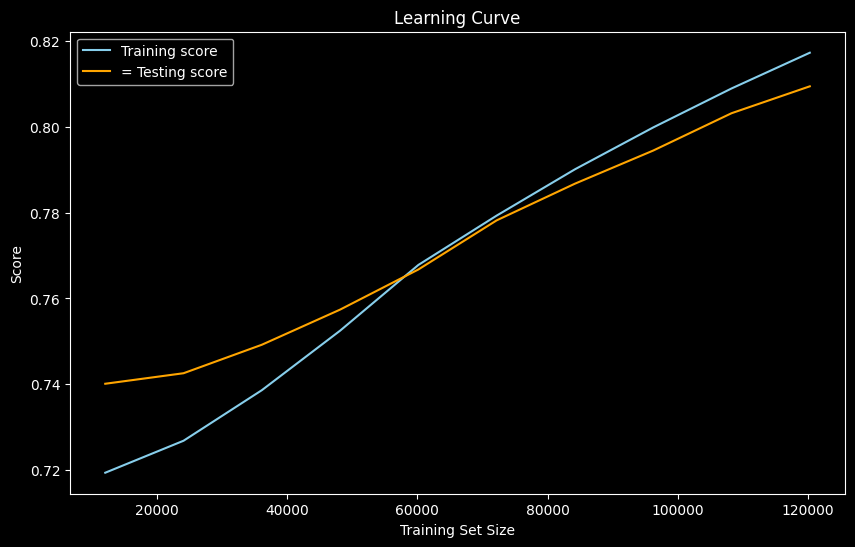

In [24]:
import numpy as np 
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    nb_classifier, X,y,
    cv= 5,
    n_jobs =-1,
    train_sizes=np.linspace(0.1, 1.0, 10))


# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1),label='Training score', color = 'skyblue')
plt.plot(train_sizes, np.mean(test_scores, axis=1),label='= Testing score', color = 'orange')
plt.title('Naive Bayes Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [25]:
import joblib
import os 

# Create a directory for models if it doesnt exist already
os.makedirs('models', exist_ok=True)

# Save model and vectorizer
joblib.dump(nb_classifier,'models/naive_bayes_model.pkl')
joblib.dump(vectorizer,'models/vectorizer.pkl')
print('Model and vectorizer saved in the models directory')
            

Model and vectorizer saved in the models directory


In [26]:
# Load model and vectorizer
loaded_nb_classifier = joblib.load('models/naive_bayes_model.pkl')
loaded_vectorizer = joblib.load('models/vectorizer.pkl')


print(f'Loaded Naive Bayes Model : {type(loaded_nb_classifier)}  and vectorizer : {type(loaded_vectorizer)}')

Loaded Naive Bayes Model : <class 'sklearn.naive_bayes.MultinomialNB'>  and vectorizer : <class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [31]:
# Test with sample input
sample_text = ['This app is terrible!!!']
sample_vectorized = loaded_vectorizer.transform(sample_text) # transform text into a matrix or tokens
prediction = loaded_nb_classifier.predict(sample_vectorized)

print(f'Predicted statement : {prediction[0]}')

Predicted statement : Negative
